Loading and Exploring the Datasets

In [1]:
import pandas as pd

# Load the entire Grassland Excel file
file_path_2 = "C:/Users/marve/OneDrive/Desktop/GUVI/Projects/Project_2_Birds_Observation/Bird_Monitoring_Data_GRASSLAND.XLSX"
sheets_2 = pd.ExcelFile(file_path_2).sheet_names

# Read all sheets into a dictionary of DataFrames
grassland_dfs = {sheet: pd.read_excel(file_path_2, sheet_name=sheet) for sheet in sheets_2}

# Combine all sheets into a single DataFrame
grassland_df = pd.concat(grassland_dfs.values(), ignore_index=True)

# Display dataset structure
print(grassland_df.info())
print(grassland_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8531 entries, 0 to 8530
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              8531 non-null   object        
 1   Sub_Unit_Code                0 non-null      object        
 2   Plot_Name                    8531 non-null   object        
 3   Location_Type                8531 non-null   object        
 4   Year                         8531 non-null   object        
 5   Date                         8531 non-null   datetime64[ns]
 6   Start_Time                   8531 non-null   object        
 7   End_Time                     8531 non-null   object        
 8   Observer                     8531 non-null   object        
 9   Visit                        8531 non-null   object        
 10  Interval_Length              8531 non-null   object        
 11  ID_Method                    8530 non-null 

C:\Users\marve\AppData\Local\Temp\ipykernel_40112\1974773077.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  grassland_df = pd.concat(grassland_dfs.values(), ignore_index=True)


Data Cleaning and Preprocessing

In [2]:
# Check for missing values in Forest Dataset
print(grassland_df.isnull().sum())

# Fill missing values with appropriate methods
grassland_df.fillna({
    "Temperature": grassland_df["Temperature"].median(),
    "Humidity": grassland_df["Humidity"].median(),
    "Sky": "Unknown",
    "Wind": "Unknown"
}, inplace=True)

# Drop rows where essential information is missing
grassland_df.dropna(subset=["Common_Name", "Scientific_Name", "Location_Type"], inplace=True)

Admin_Unit_Code                   0
Sub_Unit_Code                  8531
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                       1394
Flyover_Observed                  0
Sex                               0
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                      24
TaxonCode                         2
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                       0
Previously_Obs              

In [3]:
# Standardizing Columns for Grassland dataset
# Convert Date column to datetime format
#grassland_df["Date"] = pd.to_datetime(grassland_df["Date"])

# Standardize text columns (e.g., remove extra spaces, lowercase)
#grassland_df["Location_Type"] = grassland_df["Location_Type"].str.strip().str.lower()
#grassland_df["Common_Name"] = grassland_df["Common_Name"].str.title()


Exploratory Data Analysis (EDA)

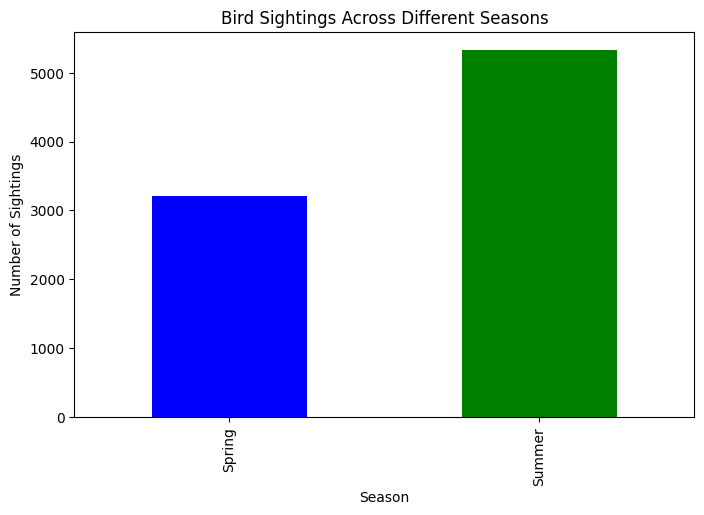

In [4]:
# 1. Temporal Analysis

import matplotlib.pyplot as plt
import seaborn as sns

grassland_df["Month"] = grassland_df["Date"].dt.month
grassland_df["Year"] = grassland_df["Date"].dt.year

# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

grassland_df["Season"] = grassland_df["Month"].apply(get_season)

# Count bird sightings per season
seasonal_trends = grassland_df.groupby("Season")["Common_Name"].count()

# Plot seasonal trends
plt.figure(figsize=(8, 5))
seasonal_trends.plot(kind="bar", color=["blue", "green", "red", "orange"])
plt.xlabel("Season")
plt.ylabel("Number of Sightings")
plt.title("Bird Sightings Across Different Seasons")
plt.show()

C:\Users\marve\AppData\Local\Temp\ipykernel_40112\383017760.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=biodiversity, x="Location_Type", y="Common_Name", palette="viridis")


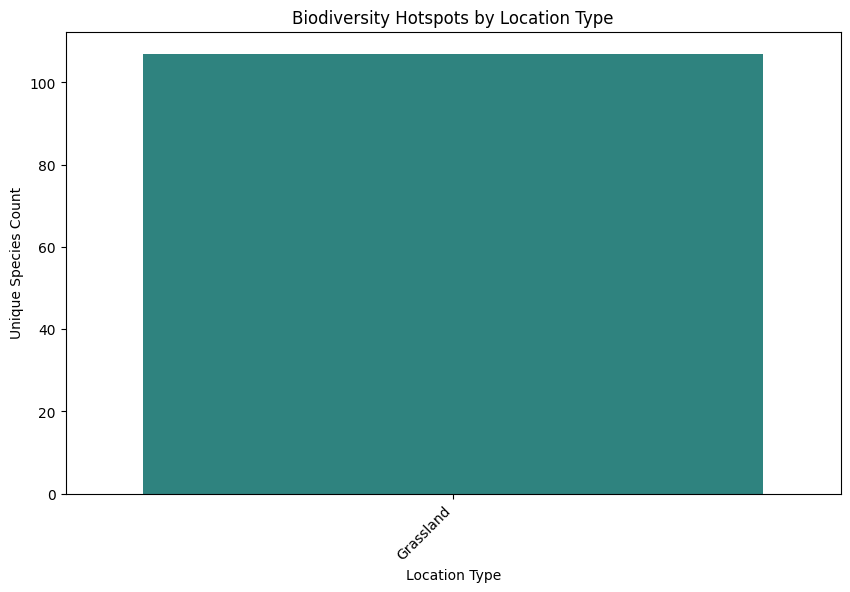

C:\Users\marve\AppData\Local\Temp\ipykernel_40112\383017760.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_analysis, x="Plot_Name", y="Common_Name", palette="mako")


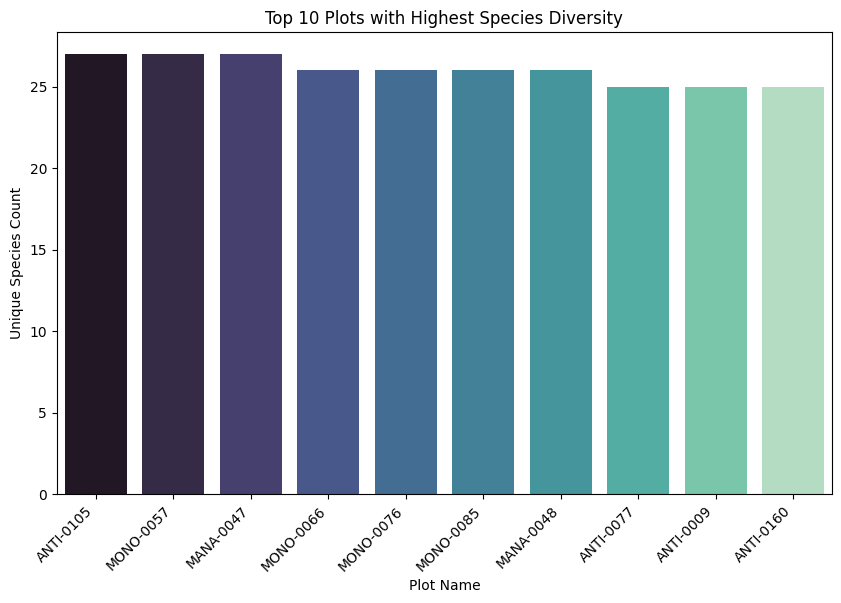

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Biodiversity Hotspots (Species count by Location_Type)
biodiversity = grassland_df.groupby("Location_Type")["Common_Name"].nunique().reset_index()
biodiversity = biodiversity.sort_values(by="Common_Name", ascending=False)

# Visualization: Biodiversity Hotspots
plt.figure(figsize=(10, 6))
sns.barplot(data=biodiversity, x="Location_Type", y="Common_Name", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Location Type")
plt.ylabel("Unique Species Count")
plt.title("Biodiversity Hotspots by Location Type")
plt.show()

# 2. Plot-Level Analysis (Observations by Plot_Name)
plot_analysis = grassland_df.groupby("Plot_Name")["Common_Name"].nunique().reset_index()
plot_analysis = plot_analysis.sort_values(by="Common_Name", ascending=False).head(10)  # Top 10 plots

# Visualization: Observations per Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_analysis, x="Plot_Name", y="Common_Name", palette="mako")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Plot Name")
plt.ylabel("Unique Species Count")
plt.title("Top 10 Plots with Highest Species Diversity")
plt.show()



C:\Users\marve\AppData\Local\Temp\ipykernel_40112\3778747388.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=species_diversity, x="Location_Type", y="Scientific_Name", palette="coolwarm")


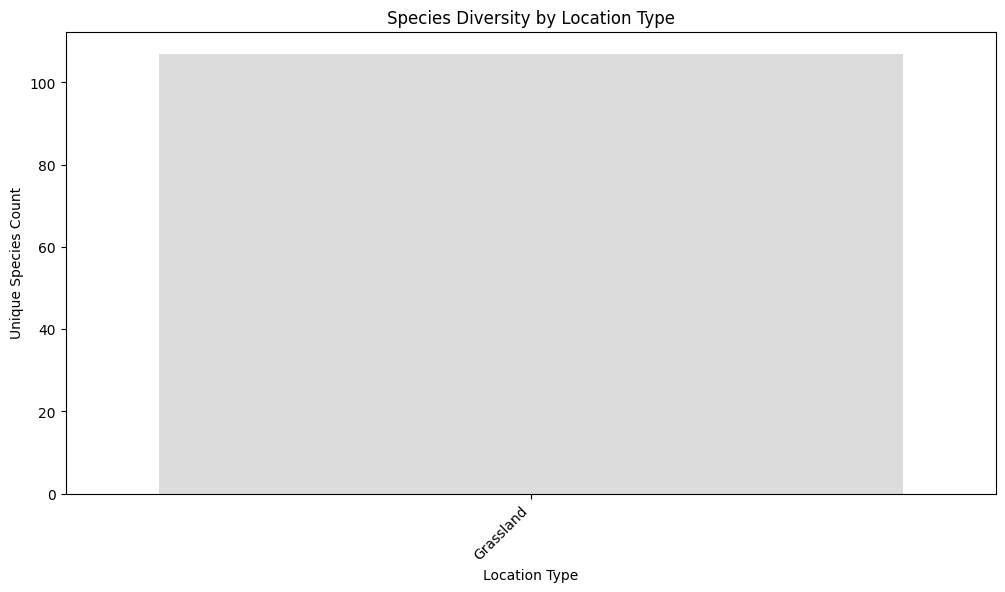

C:\Users\marve\AppData\Local\Temp\ipykernel_40112\3778747388.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=id_method_counts, x="ID_Method", y="Count", palette="viridis")


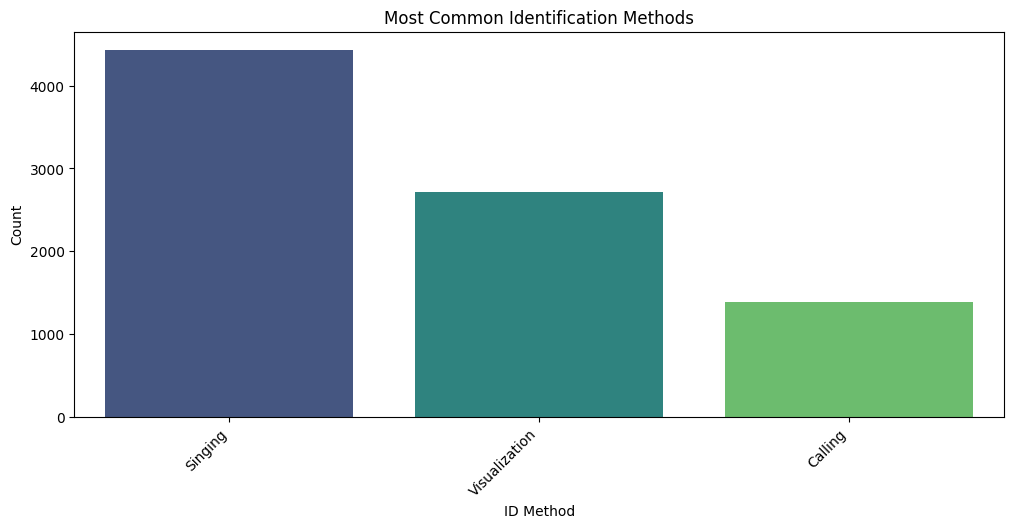

C:\Users\marve\AppData\Local\Temp\ipykernel_40112\3778747388.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=interval_length_counts, x="Interval_Length", y="Count", palette="magma")


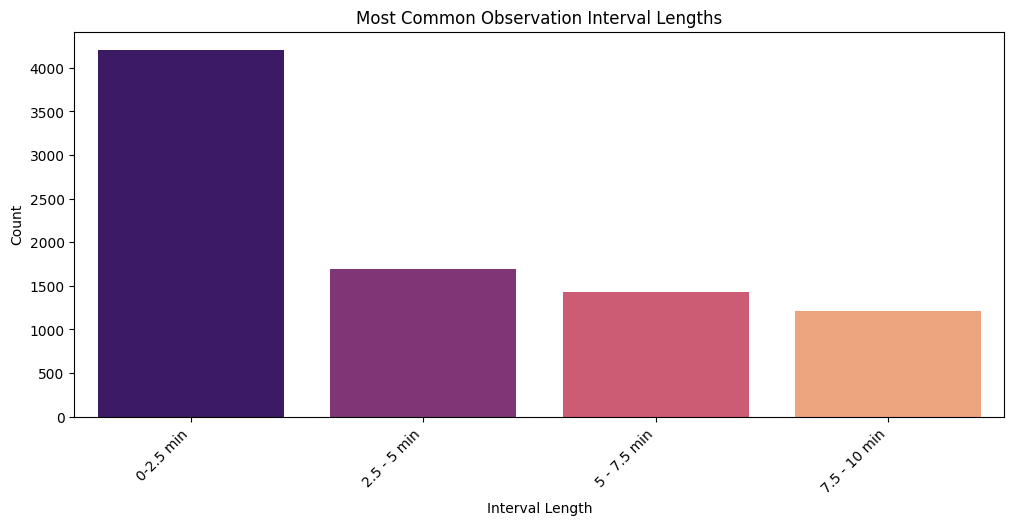

C:\Users\marve\AppData\Local\Temp\ipykernel_40112\3778747388.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_species_sex_ratio, x=top_species_sex_ratio.index, y="Male_Female_Ratio", palette="coolwarm")


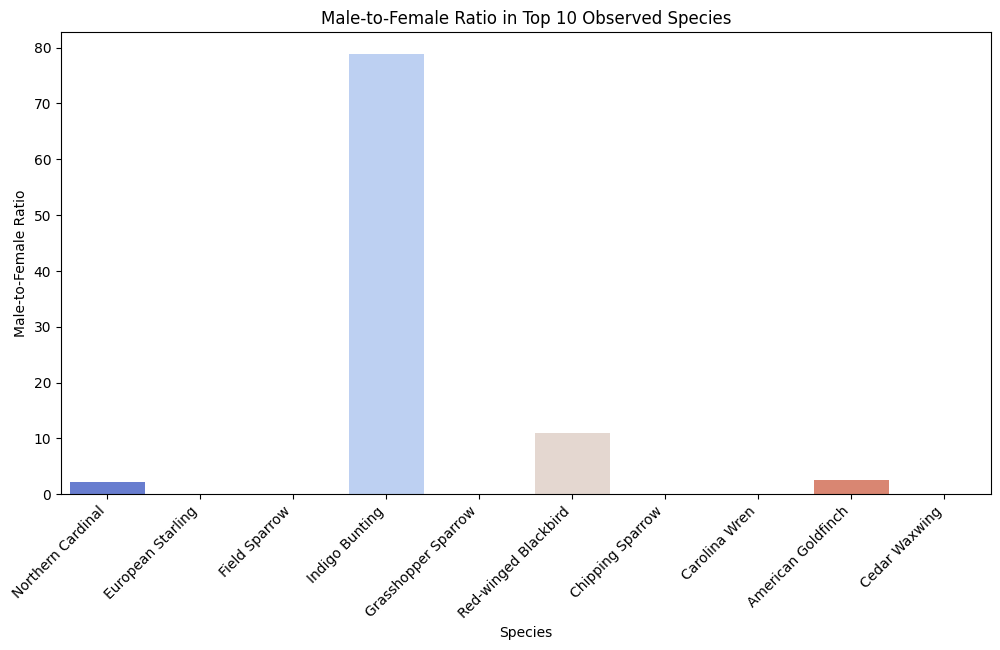

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Diversity Metrics - Unique species per Location_Type
species_diversity = grassland_df.groupby("Location_Type")["Scientific_Name"].nunique().reset_index()
species_diversity = species_diversity.sort_values(by="Scientific_Name", ascending=False)

# Visualization: Species Diversity across Location Types
plt.figure(figsize=(12, 6))
sns.barplot(data=species_diversity, x="Location_Type", y="Scientific_Name", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Location Type")
plt.ylabel("Unique Species Count")
plt.title("Species Diversity by Location Type")
plt.show()

## 2. Activity Patterns - Most Common ID Methods and Interval Lengths
id_method_counts = grassland_df["ID_Method"].value_counts().reset_index()
id_method_counts.columns = ["ID_Method", "Count"]  # Rename columns properly

interval_length_counts = grassland_df["Interval_Length"].value_counts().reset_index()
interval_length_counts.columns = ["Interval_Length", "Count"]

# Visualization: ID Methods
plt.figure(figsize=(12, 5))
sns.barplot(data=id_method_counts, x="ID_Method", y="Count", palette="viridis")
plt.xlabel("ID Method")
plt.ylabel("Count")
plt.title("Most Common Identification Methods")
plt.xticks(rotation=45, ha="right")
plt.show()

# Visualization: Interval Lengths
plt.figure(figsize=(12, 5))
sns.barplot(data=interval_length_counts, x="Interval_Length", y="Count", palette="magma")
plt.xlabel("Interval Length")
plt.ylabel("Count")
plt.title("Most Common Observation Interval Lengths")
plt.xticks(rotation=45, ha="right")
plt.show()

## 3. Sex Ratio Analysis
sex_counts = grassland_df.groupby(["Common_Name", "Sex"]).size().unstack(fill_value=0)
sex_counts["Total"] = sex_counts.sum(axis=1)
sex_counts["Male_Female_Ratio"] = sex_counts.get("Male", 0) / (sex_counts.get("Female", 1))  # Avoid division by zero

# Top 10 species with most data on sex
top_species_sex_ratio = sex_counts.sort_values(by="Total", ascending=False).head(10)

# Visualization: Male-to-Female Ratio
plt.figure(figsize=(12, 6))
sns.barplot(data=top_species_sex_ratio, x=top_species_sex_ratio.index, y="Male_Female_Ratio", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Species")
plt.ylabel("Male-to-Female Ratio")
plt.title("Male-to-Female Ratio in Top 10 Observed Species")
plt.show()



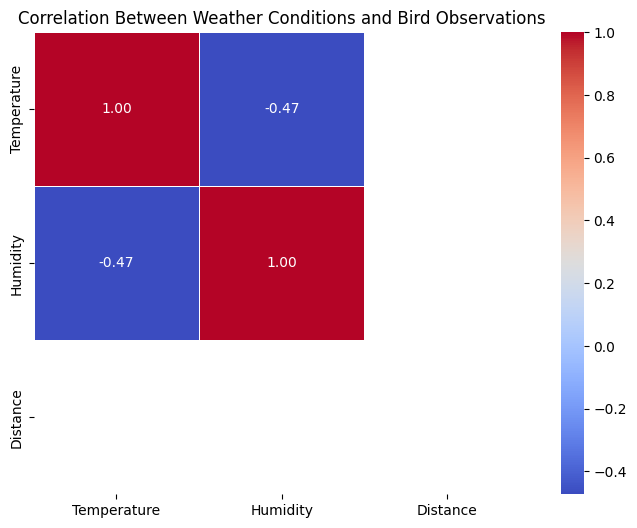

C:\Users\marve\AppData\Local\Temp\ipykernel_40112\27522382.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=bird_counts_temp, x="Temperature", y="Bird_Count", alpha=0.5, palette="viridis")


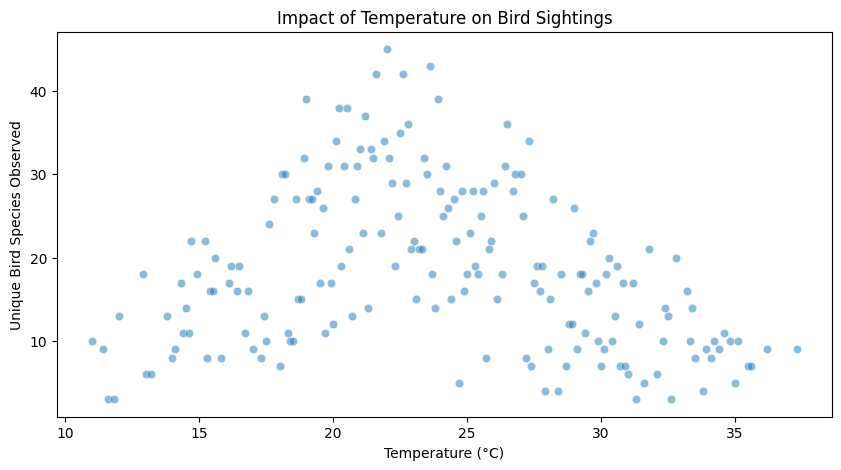

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the columns exist before processing
weather_cols = ["Temperature", "Humidity", "Distance"]
existing_cols = [col for col in weather_cols if col in grassland_df.columns]

# Convert to numeric where possible
grassland_df[existing_cols] = grassland_df[existing_cols].apply(pd.to_numeric, errors='coerce')

# Aggregate bird counts per temperature level
bird_counts_temp = grassland_df.groupby("Temperature")["Common_Name"].nunique().reset_index()
bird_counts_temp.columns = ["Temperature", "Bird_Count"]

# Compute correlation matrix (excluding Common_Name directly)
weather_corr = grassland_df[existing_cols].corr()

# Heatmap: Correlation Between Weather Conditions and Bird Observations
plt.figure(figsize=(8, 6))
sns.heatmap(weather_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Weather Conditions and Bird Observations")
plt.show()

# Scatterplot: Temperature vs Bird Sightings
plt.figure(figsize=(10, 5))
sns.scatterplot(data=bird_counts_temp, x="Temperature", y="Bird_Count", alpha=0.5, palette="viridis")
plt.xlabel("Temperature (°C)")
plt.ylabel("Unique Bird Species Observed")
plt.title("Impact of Temperature on Bird Sightings")
plt.show()




C:\Users\marve\AppData\Local\Temp\ipykernel_40112\535455845.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=flyover_counts, x="Flyover_Observed", y="Count", palette="coolwarm")


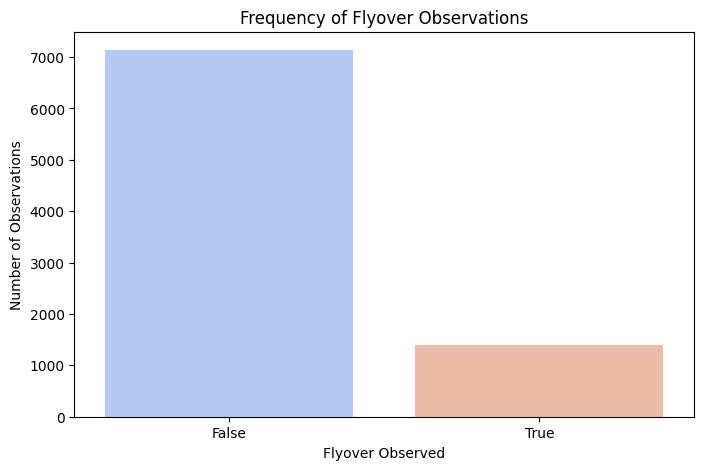

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 5. Distance and Behavior Analysis

# Flyover Frequency: Analyze trends in flyover observations
if "Flyover_Observed" in grassland_df.columns:
    flyover_counts = grassland_df["Flyover_Observed"].value_counts().reset_index()
    flyover_counts.columns = ["Flyover_Observed", "Count"]

    plt.figure(figsize=(8, 5))
    sns.barplot(data=flyover_counts, x="Flyover_Observed", y="Count", palette="coolwarm")
    plt.xlabel("Flyover Observed")
    plt.ylabel("Number of Observations")
    plt.title("Frequency of Flyover Observations")
    plt.show()


C:\Users\marve\AppData\Local\Temp\ipykernel_40112\215124372.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=observer_analysis, x="Observer", y="Unique_Species", palette="coolwarm")


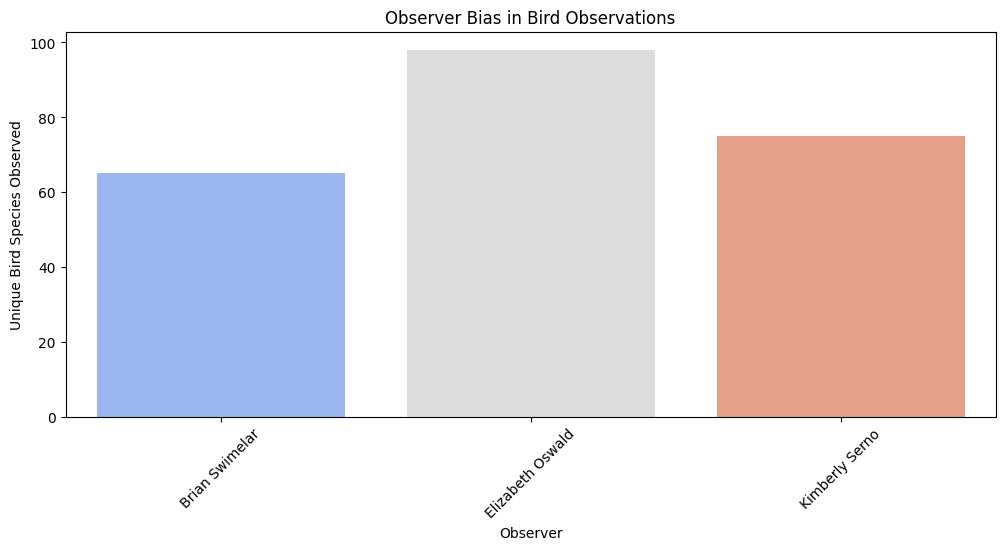

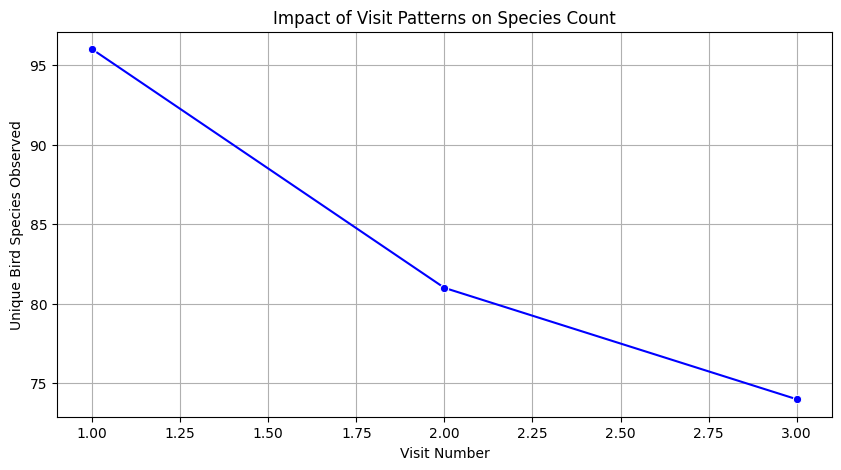

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Observer Bias: Count unique species observed by each observer
observer_analysis = grassland_df.groupby("Observer")["Common_Name"].nunique().reset_index()
observer_analysis.columns = ["Observer", "Unique_Species"]

# Check if DataFrame is not empty
if not observer_analysis.empty:
    # Plot: Observer vs Unique Species Count
    plt.figure(figsize=(12, 5))
    sns.barplot(data=observer_analysis, x="Observer", y="Unique_Species", palette="coolwarm")
    plt.xlabel("Observer")
    plt.ylabel("Unique Bird Species Observed")
    plt.title("Observer Bias in Bird Observations")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No data available for observer analysis.")

# Visit Patterns: Count unique species observed per visit
visit_analysis = grassland_df.groupby("Visit")["Common_Name"].nunique().reset_index()
visit_analysis.columns = ["Visit", "Unique_Species"]

# Check if DataFrame is not empty
if not visit_analysis.empty:
    # Plot: Visit vs Unique Species Count
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=visit_analysis, x="Visit", y="Unique_Species", marker="o", color="b")
    plt.xlabel("Visit Number")
    plt.ylabel("Unique Bird Species Observed")
    plt.title("Impact of Visit Patterns on Species Count")
    plt.grid(True)
    plt.show()
else:
    print("No data available for visit analysis.")


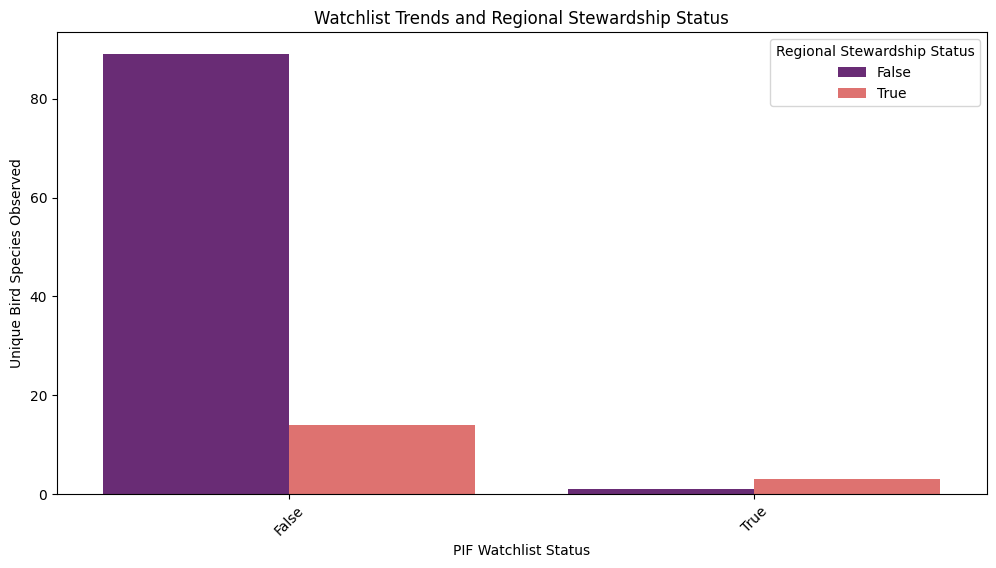

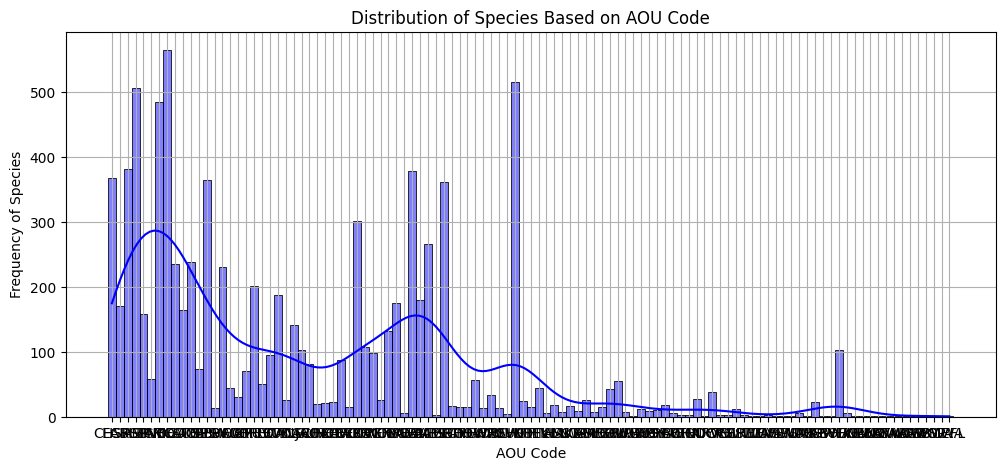

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Watchlist Trends: Count species based on PIF Watchlist and Regional Stewardship Status
if "PIF_Watchlist_Status" in grassland_df.columns and "Regional_Stewardship_Status" in grassland_df.columns:
    watchlist_counts = grassland_df.groupby(["PIF_Watchlist_Status", "Regional_Stewardship_Status"])["Common_Name"].nunique().reset_index()
    watchlist_counts.columns = ["PIF_Watchlist_Status", "Regional_Stewardship_Status", "Unique_Species"]

    plt.figure(figsize=(12, 6))
    sns.barplot(data=watchlist_counts, x="PIF_Watchlist_Status", y="Unique_Species", hue="Regional_Stewardship_Status", palette="magma")
    plt.xlabel("PIF Watchlist Status")
    plt.ylabel("Unique Bird Species Observed")
    plt.title("Watchlist Trends and Regional Stewardship Status")
    plt.xticks(rotation=45)
    plt.legend(title="Regional Stewardship Status")
    plt.show()
else:
    print("PIF_Watchlist_Status or Regional_Stewardship_Status columns are missing.")

# 2. AOU Code Patterns: Analyze species distribution based on AOU Code
if "AOU_Code" in grassland_df.columns:
    plt.figure(figsize=(12, 5))
    sns.histplot(grassland_df["AOU_Code"].dropna(), bins=30, kde=True, color="b")
    plt.xlabel("AOU Code")
    plt.ylabel("Frequency of Species")
    plt.title("Distribution of Species Based on AOU Code")
    plt.grid(True)
    plt.show()
else:
    print("AOU_Code column is missing.")


In [11]:
import plotly.express as px

fig = px.histogram(grassland_df, x="Common_Name", title="Most Observed Bird Species",
                   category_orders={"Common_Name": grassland_df["Common_Name"].value_counts().index[:20]})
fig.show()


In [12]:
import plotly.figure_factory as ff

# Create a heatmap of bird observations per month & year
heatmap_data = grassland_df.pivot_table(index="Year", columns="Month", aggfunc="size")  # Count occurrences

# Convert NaN to 0 for better readability
fig = ff.create_annotated_heatmap(
    z=heatmap_data.fillna(0).values,  # Fill missing values
    x=list(heatmap_data.columns), 
    y=list(heatmap_data.index),
    annotation_text=heatmap_data.fillna(0).values.astype(str),
    colorscale="Viridis",
    showscale=True  # Show color scale
)

fig.update_layout(title="Monthly Bird Observations Heatmap", xaxis_title="Month", yaxis_title="Year")

fig.show()


Store Data in SQL Database

In [14]:
# Importing required Libraries
import pandas as pd
from sqlalchemy import create_engine, text

# Defining the connection parameters
db_user = "postgres"
db_password = "190701"
db_host = "localhost"
db_port = 5432
db_name = "Birds_Observations"

# Formating the connection string
engine_string = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# Creating the SQLAlchemy engine
engine = create_engine(engine_string)

from sqlalchemy import create_engine

# Pushing the data to PostgreSQL
# Inserting the Forest data
grassland_df.to_sql('grassland', engine, if_exists='replace', index=False)
print("Grassland data inserted into PostgreSQL.")

Grassland data inserted into PostgreSQL.
